# AI in Medicine: Data Science - Basics IV

*Instructor:* Moritz Seiler, AG Ritter, Charité - Universitätsmedizin Berlin (moritz.seiler@charite.de) <br>
*Target audience:* Medical students from Charité<br>
*Course date:* July 2020

This notebook introduces **deep learning** in Python with ***Keras***. This tutorial is meant to be an **introduction to the *Keras* library** and **<ins>not</ins> a deep dive into the theory** surrounding deep learning. The goal of this session is that you will be able to implement your own network in Python.

**First, please make sure, that you're using the Python 3/3.6 kernel!** You can check that in the top right corner of your browser window. If you're using a different Version, go to the Tab 'Kernel' --> 'Change Kernel' and select the correct kernel.

***Deep Learning Playground***

***Data set***

***Keras***
- Introduction
- Workflow
    - Prepare data
    - Build model
    - Compile model
    - Fit model
    - Predict
    - Evaluate model
    - Save model
    
***Exercises***

## Playground excersises

The *Tensorflow* Playground is an interactive visualisation of neural networks in your browser. In this playground, you can choose different hyper-parameters of your neural network and visually observe the training process. This allows you to get some intuition on neural network workings

https://playground.tensorflow.org

### Exercise

**1.** Play around and get some intution! <br>
**2.** Let's try a different dataset. Investigate the effects of the learning rate on the training results. <br>
**3.** ...

## Data set

The data we are using in this tutorial is the Diabetes data set that you have already prepared in the previous tutorial.

Source:<br>
*Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.*


In [1]:
# Import the Pandas and NumPy library
import pandas as pd
import numpy as np

# Read the Diabetes data set 
diabetes = pd.read_csv('diabetes.csv')

In [2]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## ***Keras***


Keras is a high-level neural networks API, capable of running on top of Tensorflow, Theano, and CNTK. It enables fast experimentation through a high level, user-friendly, modular and extensible API

<img src="https://keras.io/img/logo.png" width="40%">

*Source: https://keras.io/img/logo.png*

### Installation

For an installation of the *Keras* library, you have to enter the following command in the terminal.

```python
!pip install tensorflow
```

Keras comes packaged with *TensorFlow 2.0* as `tensorflow.keras`. To start using *Keras*, simply install *TensorFlow 2.0*.

*Keras* is a model-level library, providing high-level building blocks for developing deep learning models. It does not handle itself low-level operations such as tensor products, convolutions and so on. Instead, it relies on a specialized, well-optimized tensor manipulation library to do so, serving as the "backend engine" of Keras. 

Rather than picking one single tensor library and making the implementation of *Keras* tied to that library, *Keras* handles the problem in a modular way, and several different backend engines can be plugged seamlessly into *Keras*.

### Importing the library

We are not going to import the whole *Keras* library but only specific classes that we need for our implementation. This will later be done by the following command:

```python
import tensorflow
from tensorflow.keras.xyz import ...
```

### Workflow

Training your first simple neural network with Keras does not require a lot of code, but we are going to start slow, taking it step-by-step, ensuring you understand the process of how to train a network. The workflow in *Keras* consits of the following steps:
1. **Prepare data**
2. **Build model**
3. **Compile model**
4. **Fit model**
5. **Predict**
6. **Evaluate model**
7. **Save model**

We are now going to introduce all these steps in more detail in the following part of the notebook. 

#### 1. Data preparation

Before, we start building our neural network, we have to prepare our data. A first step should always be data inspection, which you have already done in the last tutorial. Here, we will split our data in different subsets to train our model and will standardise the data.

**Data splitting**

As you have learnt in the last tutorial, we have to split our dataset in subsets since we do not know the (hidden) data generating distribution to calculate the true error of our model. For this, we split the diabetes dataset into a training set, validation set and test set using the following split 60-20-20 to approximate the true error. We use the `train_test_split()`function from them `sklearn.model_selection` module to split the dataset.

Here, we split the dataset only in a training and test set. Later in the training step, we use *Keras* functionality to create a validation set from the training set. 

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes[['Glucose','BMI','Age']], diabetes['Outcome'], test_size=0.2)

Let's check how many observations are in each data set.

In [4]:
print("Number of training samples: %i" % len(X_train))
print("Number of test samples: %i" % len(X_test))

Number of training samples: 614
Number of test samples: 154


**Tranformations**

Convergence is ususally faster if the **average of each input variable**  over the training set is **close to zero**. In general, any shift of the average input away from zero will bias the updates in a particular direction and thus slow down learning. Additionally, **scaling the inputs** - to have **about the same covariance** - speeds up learning because it helps to balance out the rate at which the weights connected to the input nodes learn. Therefore, we will *standardize* our data 

$$z=\frac{x-\mu}{\sigma} $$

with mean $\mu$ and standard deviation $\sigma$. This transformation will speed up and stabilise the training process. We can use the `StandardScaler()` function from the `sklearn.preprocessing` module for the standardisation.

In [85]:
from sklearn.preprocessing import StandardScaler

# Instatiate scaler
scaler = StandardScaler()

# Train scaler on the data set
scaler.fit(X_train)

# Transform datasets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Let us have a look at our transformed training set.

In [6]:
X_train[:10,:]

array([[-0.31897686, -0.59068916,  0.55058386],
       [-1.04564103, -0.3980322 , -0.97487436],
       [ 0.72362825, -0.01271829,  2.07604209],
       [-1.7723052 , -0.01271829,  0.72007922],
       [-0.79288827, -1.45122357, -0.63588364],
       [ 1.63985699,  0.21847006, -0.21214525],
       [ 0.06015227,  0.25700145, -0.46638829],
       [ 1.95579793,  1.11753586,  0.97432226],
       [-0.38216505,  0.34690803, -0.63588364],
       [-0.91926465, -1.61819293, -0.72063132]])

Let us also check the mean and standard deviation of our standardised training dataset.

In [7]:
print(np.mean(X_train,0))
print(np.std(X_train,0))

[ 1.85157716e-16 -6.65410542e-16 -1.44654466e-16]
[1. 1. 1.]


#### 2. Model Building

The core data structures of *Keras* are **layers** and **models**. There are three ways to create Keras models:

- The Sequential model is simply a linear stack of layers. *(for simple implementations)*
- The Functional API fully-featured API that supports arbitrary model architectures. *(for more complex implementations)*
- Model subclassing, where you implement everything from scratch on your own. *(for more complex implementations)*

We are going to use the **Sequential model** class in this tutorial. You simply need to import the model from the *Keras* library and initialise a model object using the following commands:

In [8]:
import tensorflow 
from tensorflow.keras.models import Sequential

model = Sequential()

/home/moritz/anaconda3/envs/pytorch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/moritz/anaconda3/envs/pytorch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/moritz/anaconda3/envs/pytorch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/moritz/anaconda3/envs/pytorch/lib/pyt

Then, we can stack layers and add those to our model object. Before we do so, the implementation of the layer types  
- dense layer and 
- convolutional layer 

is introduced, which you are going to use later in this notebook. A list of supported layer types is given in the *Keras* documentation https://keras.io/api/layers/. First, we have to import these layers from the *Keras* layer module using the following command:

```python
from tensorflow.keras.layers import Dense, Conv2D
```

**Dense layer**<br>
A dense layer/fully-connected layer is a layer in which each input neuron is connected to each output neuron, the parameters units just tells you the dimensionality of your output. 

```python
Dense(units='dimensionality of the output space',
      activation='activation function to use',
      ...)
```
*Example:*

```python
Dense(units=6, activation='relu',...)
```

**Convolutional layer**<br>
The convolutional layer’s parameters consist of a set of learnable filters. During the forward pass, we convolve each filter across the width and height of the input and compute dot products between the entries of the filter and the input at any position. By doing so, we produce an activation map that gives the responses of that filter at every spatial position.

```python
Conv2D(filters='the dimensionality of the output space (i.e. the number of output filters in convolution)', 
       kernel_size='specifying the height and width of the 2D convolutional kernel', 
       strides=' specifying the strides of the convolution along the height and width', 
       activation='activation function to use',
       ...)
```
*Example:*

```python
Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), activation='relu',...)
# if width and height are equal you can write in short
Conv2D(filters=16, kernel_size=3, strides=1, activation='relu',...)
```

We can simply add these layers to the Sequential model using the `add()` method.
Here, we add  
- an dense input layer with 4 units, 
- a dense sigmoid output layer with 1 unit

to create a **fully-connected neural network**.

In [9]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense

model.add(Input(shape=(3,)))
model.add(Dense(1, activation='sigmoid'))

We can display the content of our neural network by calling the `summary()` method.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


#### 3. Model compilation

In order to train our neural network that we have just created, we need to compile our model first. This requires us to define a loss function and an optimiser to do so. A list already implemented losses and optimisers can be found in the documentary:

- losses: https://keras.io/api/losses/,
- optimisers: https://keras.io/api/optimizers/. 

**Loss function**

The purpose of loss functions is to compute the quantity that a model should seek to minimize during training. 
This function will essentially calculate how poorly our model is performing by comparing what the model is predicting with the actual value it is supposed to output. Therefore, the selection of the loss function depends on the the task.

*Examples:*<br>

Classification:
- `BinaryCrossentropy()`<br> Computes the cross-entropy loss between true labels and predicted labels *(binary)*.
- `CategoricalCrossentropy()`<br> Computes the cross-entropy loss between true labels and predicted labels *(multi-class)*.
- ...

Regression
- `MeanSquaredError()`<br> Computes the mean of squares of errors between labels and predictions.
- ...

You can import the loss functions from the *Keras* losses module by entering the following command:

```python
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, MeanSquaredError
```

**Optimiser**

We have already dealt with the loss function, which is a mathematical way of measuring how wrong your predictions are. In other words, the loss function lets us quantify the quality of any particular set of model parameters. The goal of optimisation is to find those parameteres that minimize the loss function. For this, we can compute the best direction along which we should change our parameters that is mathematically guaranteed to be the direction of the steepest descend. This direction will be related to the gradient of the loss function.

*Examples:*
- `SGD()`<br> Stochastic gradient descent is an implementation of gradient descent - that you know from the lecture - on batches of observations or single random examples on each pass.

- `Adam()`<br> Adam stands for adaptive moment estimation, and is another way of using past gradients to calculate current gradients. Adam also utilizes the concept of momentum by adding fractions of previous gradients to the current one.

You can import the optimiser from the `tensorflow.keras.optimizers` module by entering the following command:

```python
from tensorflow.keras.optimizers import SGD, Adam
```

We instatiate the loss function and the optimiser before we pass them to the model.

In [11]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD

loss = BinaryCrossentropy()

lr = 4e-2 #lr = 0.04
optimiser = SGD(learning_rate=lr)

model.compile(loss=loss,
              optimizer=optimiser, 
              metrics=['accuracy'])

After compiling our model, we're now ready to start the training.

#### 4. Model training

To train our model we can simply use the `fit()` method. Here, we just have to provide the *number of epochs*, the *batch size* and the *training dataset* (features and targerts). Instead of providing a separate validation dataset, we use the `validation_split` functionality, which uses the last x% observations of the training dataset before shuffling to create a validation set.

At the end of each epoch, the model will iterate over the validation dataset and compute the validation loss and validation metrics.

The `fit()` method outputs a `History` object; its `History.history` attribute is a record of loss and metrics values (training + validation).

In our example, we use 50 *epochs* and a *batch size* of 64 to train our model. Additionally, we use a validation split of 0.25 such that our overall data split in training, validation and test set is 60-20-20.

In [12]:
epochs = 50
batch_size = 64


history = model.fit(x=X_train, y=y_train,
                validation_split=0.25,
                epochs=epochs, 
                batch_size=batch_size)

Train on 460 samples, validate on 154 samples
Epoch 1/50
460/460 [==============================] - 0s 331us/sample - loss: 0.5909 - accuracy: 0.6761 - val_loss: 0.5297 - val_accuracy: 0.7468
Epoch 2/50
460/460 [==============================] - 0s 23us/sample - loss: 0.5798 - accuracy: 0.6826 - val_loss: 0.5201 - val_accuracy: 0.7532
Epoch 3/50
460/460 [==============================] - 0s 24us/sample - loss: 0.5699 - accuracy: 0.6978 - val_loss: 0.5136 - val_accuracy: 0.7532
Epoch 4/50
460/460 [==============================] - 0s 23us/sample - loss: 0.5628 - accuracy: 0.7065 - val_loss: 0.5071 - val_accuracy: 0.7468
Epoch 5/50
460/460 [==============================] - 0s 24us/sample - loss: 0.5554 - accuracy: 0.7130 - val_loss: 0.5011 - val_accuracy: 0.7532
Epoch 6/50
460/460 [==============================] - 0s 28us/sample - loss: 0.5487 - accuracy: 0.7261 - val_loss: 0.4962 - val_accuracy: 0.7532
Epoch 7/50
460/460 [==============================] - 0s 25us/sample - loss: 0.5426

The `fit()` methods prints the loss and metrics values after every epochs, but we can also use the `History` object to visualise those values to get intuition about the performance of our model.

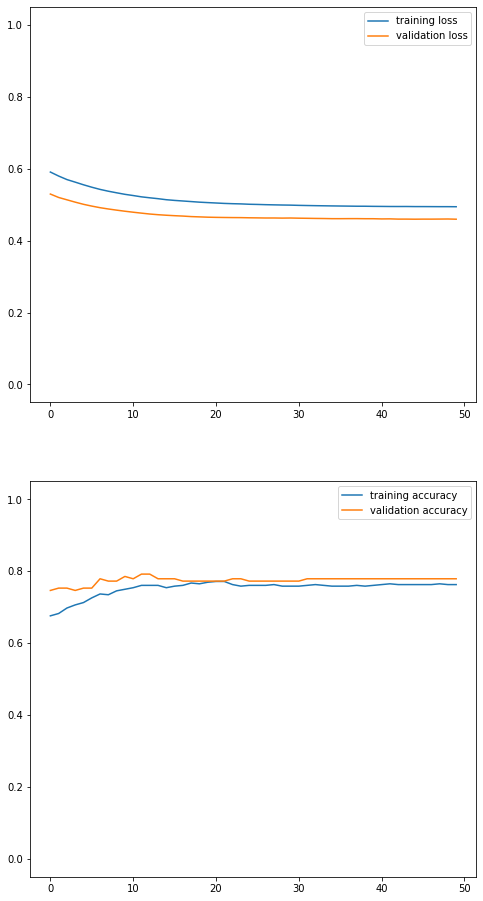

In [15]:
import matplotlib.pyplot as plt

n_epochs = np.arange(0,epochs)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,16))
ax1.plot(n_epochs, history.history['loss'], label='training loss')
ax1.plot(n_epochs, history.history['val_loss'], label='validation loss')
ax1.set_ylim(-0.05,1.05)
ax1.legend()

ax2.plot(n_epochs, history.history['accuracy'], label='training accuracy')
ax2.plot(n_epochs, history.history['val_accuracy'], label='validation accuracy')
ax2.set_ylim(-0.05,1.05)
ax2.legend()

plt.show()

#### 5. Prediciton

After training, we can use our model for predictions using the built-in `predict()` method, which returns the probabilities $P(Outcome=1|X,w)$.

In [18]:
y_pred = model.predict(X_test).ravel()

In [19]:
y_pred

array([0.23363394, 0.19101465, 0.32774347, 0.37707105, 0.24671161,
       0.5680933 , 0.09473667, 0.5253392 , 0.09884593, 0.16297433,
       0.13369459, 0.01959369, 0.3574983 , 0.7709298 , 0.31527805,
       0.86189616, 0.75545293, 0.36062098, 0.0714446 , 0.05256757,
       0.10077009, 0.28155503, 0.17133763, 0.3612813 , 0.2428836 ,
       0.0622848 , 0.5490081 , 0.5805227 , 0.14105171, 0.1653612 ,
       0.11777353, 0.08161387, 0.14921317, 0.07147431, 0.37299824,
       0.48112127, 0.80588806, 0.85305184, 0.15870887, 0.47631073,
       0.79163706, 0.7893084 , 0.21224412, 0.05299869, 0.37533912,
       0.8513756 , 0.33967003, 0.16915196, 0.2352776 , 0.7303634 ,
       0.16867438, 0.0871383 , 0.24041286, 0.12301627, 0.2914477 ,
       0.22703794, 0.07067338, 0.25390726, 0.91359603, 0.04758871,
       0.8525177 , 0.5329949 , 0.08439872, 0.32597333, 0.74738383,
       0.12344834, 0.44894883, 0.4153154 , 0.00847298, 0.1344125 ,
       0.89880645, 0.06374004, 0.13166076, 0.348765  , 0.07485

If you're not interested in the probability $P(Outcome=1|X,w)$ but simply want to predict the class label, you can use the `predict_classes()` method. This method uses a threshold of 0.5 to classify examples.

In [17]:
model.predict_classes(X_test).ravel()

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

#### 6. Model evaluation

To see how good/bad those predictions are, we've to evaluate them using the built-in `evaluate()` method. This returns the loss and metrics values for the model in test mode.

In [16]:
loss_and_metrics = model.evaluate(X_test, y_test, 
                                  batch_size=batch_size)

154/154 [==============================] - 0s 23us/sample - loss: 0.4959 - accuracy: 0.7662


In addition to loss and metrics values, we're going to use the receiver operating characteristics (ROC) and the area under the curve (AUC) to evaluate our model. We can use the `roc_curve()` and `auc` function from the `sklearn.metrics` module to calculate those values. 

In [17]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr, tpr)

After calculating all values, we can use *matplotllib* to plot the ROC curve.

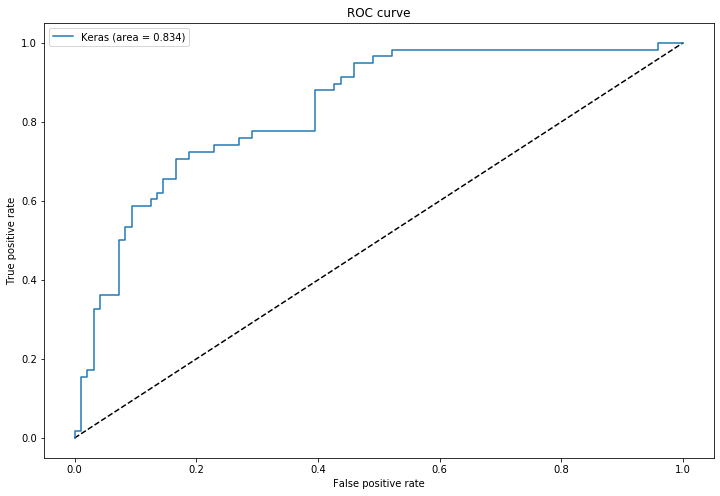

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.set_title('ROC curve')
ax.legend(loc='best')

plt.show()

#### 7. Model saving

A Keras model consists of multiple components:

- An architecture, or configuration, which specifyies what layers the model contains, and how they're connected.
- A set of weights values (the "state of the model").
- An optimizer (defined by compiling the model).
- A set of losses and metrics (defined by compiling the model).

We can save these pieces to disk at once into a single archive in the *Tensorflow* `SavedModel`.

```python
model.save('path/to/location')
```

We can save our neural network to the working directory by entering the following command:

In [19]:
model.save('my_nn')

This can then simply be loaded using the following command:

```python
model = tensorflow.keras.models.load_model('my_nn')
```

**Put everything together**<br>
After having itroduced all the steps separately in more detail, everything is put together in one cell, so you don't have to scroll too much.

Train on 460 samples, validate on 154 samples
Epoch 1/100
460/460 [==============================] - 0s 445us/sample - loss: 0.6138 - accuracy: 0.6457 - val_loss: 0.5578 - val_accuracy: 0.7338
Epoch 2/100
460/460 [==============================] - 0s 73us/sample - loss: 0.5865 - accuracy: 0.6370 - val_loss: 0.5294 - val_accuracy: 0.7468
Epoch 3/100
460/460 [==============================] - 0s 76us/sample - loss: 0.5748 - accuracy: 0.6413 - val_loss: 0.5153 - val_accuracy: 0.7532
Epoch 4/100
460/460 [==============================] - 0s 87us/sample - loss: 0.5683 - accuracy: 0.6457 - val_loss: 0.5063 - val_accuracy: 0.7403
Epoch 5/100
460/460 [==============================] - 0s 80us/sample - loss: 0.5637 - accuracy: 0.6609 - val_loss: 0.5002 - val_accuracy: 0.7532
Epoch 6/100
460/460 [==============================] - 0s 78us/sample - loss: 0.5601 - accuracy: 0.6565 - val_loss: 0.4956 - val_accuracy: 0.7468
Epoch 7/100
460/460 [==============================] - 0s 78us/sample - loss:

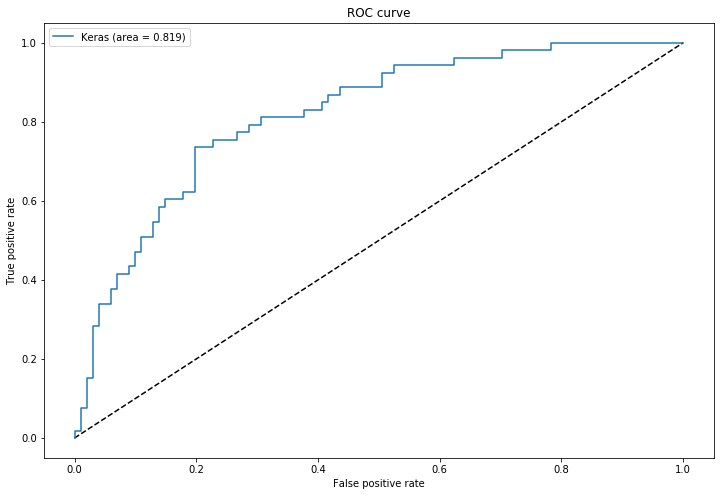

In [77]:
import tensorflow 
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt


## Data preparation
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(diabetes[['Glucose','BMI','Age']], 
                                                    diabetes['Outcome'], 
                                                    test_size=0.2)

# Data transformation       
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



## Model building
model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## Model compilation
# Loss function
loss = BinaryCrossentropy()

# Optimiser
lr = 4e-2 
optimiser = SGD(learning_rate=lr)

model.compile(loss=loss,
              optimizer=optimiser, 
              metrics=['accuracy'])

## Model training
epochs = 50
batch_size = 16

history = model.fit(x=X_train, y=y_train, 
                    validation_split=0.25,
                    epochs=epochs,
                    batch_size=batch_size)


n_epochs = np.arange(0,epochs)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,16))
ax1.plot(n_epochs, history.history['loss'], label='training loss')
ax1.plot(n_epochs, history.history['val_loss'], label='validation loss')
ax1.set_ylim(-0.05,1.05)
ax1.legend()

ax2.plot(n_epochs, history.history['accuracy'], label='training accuracy')
ax2.plot(n_epochs, history.history['val_accuracy'], label='validation accuracy')
ax2.set_ylim(-0.05,1.05)
ax2.legend()
plt.show()

## Prediciton
y_pred = model.predict(X_test).ravel()

## Model evaluation
loss_and_metrics = model.evaluate(X_test, y_test, 
                                  batch_size=batch_size)

fpr, tpr, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr, tpr)

fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.set_title('ROC curve')
ax.legend(loc='best')

plt.show()

## Save model
model.save('my_nn')

## Exercises

Now that you know the basics to implement a neural network in *Keras*, it's time for you to get your hands dirty and get started.

### 1) Fully-connected neural network (Basic)

***Task:*** Please **implement your own classifier to predict the outcome classes** in the diabetes dataset. <br>
***Model:*** Use a fully-connected neural network with at least 1 hidden layer.<br> (*Note:* Since this is still a binary classification task, please use 1 unit and the sigmoid activation in your output layer.)<br>
***Data:*** Use all available data features to predict the outcome class.

Do your results look different from the ones in the example above?

#### Data preparation

In [160]:
### Data preparation ###
# TO DO: Split and transform dataset




#### Model building

In [161]:
### Model building ###
model = Sequential()
# TO DO: Create a neural network with at least 1 hidden layer


model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_65 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_66 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 5         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


#### Model compilation

In [162]:
# TO DO: Define loss function and optimiser


# TO DO: compile model




#### Model training

In [163]:
# TO DO: Choose the training length and batch size

history = # TO DO: Train your model (Don't forget validation_split)



Train on 460 samples, validate on 154 samples
Epoch 1/200
460/460 [==============================] - 0s 503us/sample - loss: 0.7146 - accuracy: 0.6304 - val_loss: 0.7705 - val_accuracy: 0.5779
Epoch 2/200
460/460 [==============================] - 0s 78us/sample - loss: 0.7029 - accuracy: 0.6565 - val_loss: 0.7531 - val_accuracy: 0.5779
Epoch 3/200
460/460 [==============================] - 0s 85us/sample - loss: 0.6931 - accuracy: 0.6565 - val_loss: 0.7407 - val_accuracy: 0.5779
Epoch 4/200
460/460 [==============================] - 0s 91us/sample - loss: 0.6848 - accuracy: 0.6565 - val_loss: 0.7294 - val_accuracy: 0.5844
Epoch 5/200
460/460 [==============================] - 0s 81us/sample - loss: 0.6771 - accuracy: 0.6565 - val_loss: 0.7187 - val_accuracy: 0.5844
Epoch 6/200
460/460 [==============================] - 0s 75us/sample - loss: 0.6698 - accuracy: 0.6565 - val_loss: 0.7091 - val_accuracy: 0.5844
Epoch 7/200
460/460 [==============================] - 0s 86us/sample - loss:

460/460 [==============================] - 0s 77us/sample - loss: 0.4648 - accuracy: 0.7804 - val_loss: 0.4756 - val_accuracy: 0.8117
Epoch 57/200
460/460 [==============================] - 0s 77us/sample - loss: 0.4640 - accuracy: 0.7826 - val_loss: 0.4741 - val_accuracy: 0.8117
Epoch 58/200
460/460 [==============================] - 0s 72us/sample - loss: 0.4627 - accuracy: 0.7826 - val_loss: 0.4722 - val_accuracy: 0.8182
Epoch 59/200
460/460 [==============================] - 0s 77us/sample - loss: 0.4619 - accuracy: 0.7826 - val_loss: 0.4716 - val_accuracy: 0.8182
Epoch 60/200
460/460 [==============================] - 0s 74us/sample - loss: 0.4614 - accuracy: 0.7870 - val_loss: 0.4715 - val_accuracy: 0.8182
Epoch 61/200
460/460 [==============================] - 0s 76us/sample - loss: 0.4601 - accuracy: 0.7848 - val_loss: 0.4701 - val_accuracy: 0.8182
Epoch 62/200
460/460 [==============================] - 0s 90us/sample - loss: 0.4593 - accuracy: 0.7848 - val_loss: 0.4702 - val_a

Epoch 112/200
460/460 [==============================] - 0s 77us/sample - loss: 0.4292 - accuracy: 0.7957 - val_loss: 0.4642 - val_accuracy: 0.8247
Epoch 113/200
460/460 [==============================] - 0s 83us/sample - loss: 0.4291 - accuracy: 0.7957 - val_loss: 0.4647 - val_accuracy: 0.8312
Epoch 114/200
460/460 [==============================] - 0s 85us/sample - loss: 0.4284 - accuracy: 0.7957 - val_loss: 0.4649 - val_accuracy: 0.8247
Epoch 115/200
460/460 [==============================] - 0s 89us/sample - loss: 0.4285 - accuracy: 0.7935 - val_loss: 0.4639 - val_accuracy: 0.8247
Epoch 116/200
460/460 [==============================] - 0s 89us/sample - loss: 0.4276 - accuracy: 0.7978 - val_loss: 0.4645 - val_accuracy: 0.8182
Epoch 117/200
460/460 [==============================] - 0s 79us/sample - loss: 0.4270 - accuracy: 0.8000 - val_loss: 0.4650 - val_accuracy: 0.8182
Epoch 118/200
460/460 [==============================] - 0s 80us/sample - loss: 0.4270 - accuracy: 0.7978 - val_

460/460 [==============================] - 0s 73us/sample - loss: 0.4125 - accuracy: 0.8196 - val_loss: 0.4687 - val_accuracy: 0.8052
Epoch 168/200
460/460 [==============================] - 0s 80us/sample - loss: 0.4122 - accuracy: 0.8217 - val_loss: 0.4698 - val_accuracy: 0.8052
Epoch 169/200
460/460 [==============================] - 0s 74us/sample - loss: 0.4123 - accuracy: 0.8196 - val_loss: 0.4680 - val_accuracy: 0.8052
Epoch 170/200
460/460 [==============================] - 0s 73us/sample - loss: 0.4114 - accuracy: 0.8130 - val_loss: 0.4699 - val_accuracy: 0.8052
Epoch 171/200
460/460 [==============================] - 0s 74us/sample - loss: 0.4112 - accuracy: 0.8174 - val_loss: 0.4701 - val_accuracy: 0.8052
Epoch 172/200
460/460 [==============================] - 0s 79us/sample - loss: 0.4106 - accuracy: 0.8152 - val_loss: 0.4696 - val_accuracy: 0.8052
Epoch 173/200
460/460 [==============================] - 0s 78us/sample - loss: 0.4108 - accuracy: 0.8152 - val_loss: 0.4719 -

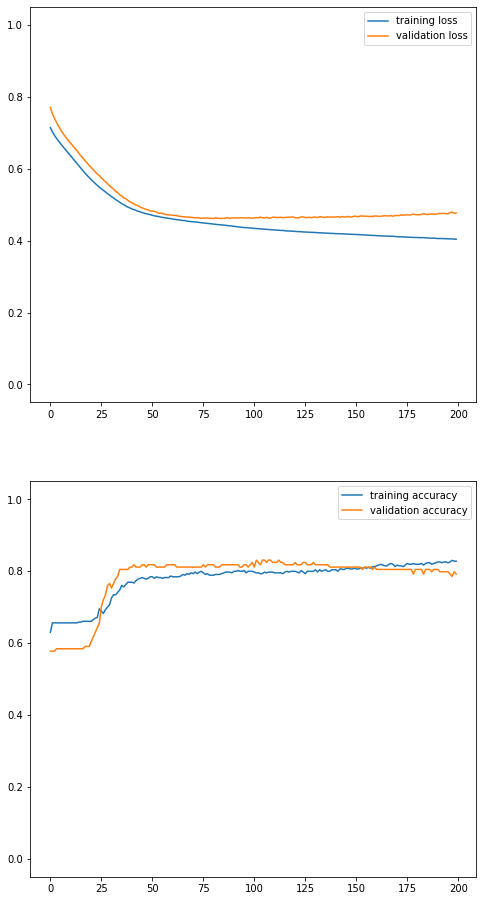

In [164]:
n_epochs = np.arange(0,epochs)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,16))
ax1.plot(n_epochs, history.history['loss'], label='training loss')
ax1.plot(n_epochs, history.history['val_loss'], label='validation loss')
ax1.set_ylim(-0.05,1.05)
ax1.legend()

ax2.plot(n_epochs, history.history['accuracy'], label='training accuracy')
ax2.plot(n_epochs, history.history['val_accuracy'], label='validation accuracy')
ax2.set_ylim(-0.05,1.05)
ax2.legend()
plt.show()

#### Model evaluation

In [ ]:
# TO DO: Calculate test loss and accurcy

### 2) Convolutional neural network (Advanced)

The second task is to implement a multi-class image classifier for the famous MNIST dataset. This dataset contains 70,000 (28*28 pixel) images of digits 0-9.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" width="40%">

*Source: https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png*


***Task:*** Please **implement your own multi-class image classifier to predict the outcome classes** in the diabetes dataset. <br>
***Model:*** Use a convolutional neural network with at least 1 hidden convolutional layer.<br> (*Note:* Since this is still a multi-class classification task, please use 10 units and the softmax activation in your output layer.)<br>
***Data:*** Use the 28*28 pixel images to predict the digit class.


#### Data preparation

Before we can use the MNIST data to predict the class labels, we have to **split** the dataset, **normalise** (transform range from 0-255 to 0-1) and reshape the data and **one-hot encode** the target. The data preparation step is already done for you, just execute the following cell and check the data.

In [165]:
# Import the MNIST dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST images and labels and normalise (range 0 to 1) image data
(X_train, y_train), (X_test, y_test) = mnist.load_data() # 60,000 training + 10,000 test images/labels
X_train = X_train / 255.0
X_test  = X_test / 255.0

# Reshape dataset to have a single channel 
X_train = trainX.reshape((X_train.shape[0], 28, 28, 1)) # The CNN requires this layout
X_test = testX.reshape((X_test.shape[0], 28, 28, 1)) # The CNN requires this layout

# One-hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Let's have a look at the image data...

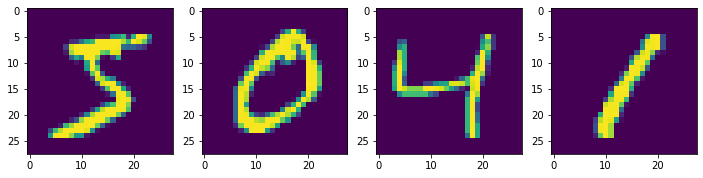

In [166]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(12,4))
ax1.imshow(X_train[0,:,:,0])
ax2.imshow(X_train[1,:,:,0])
ax3.imshow(X_train[2,:,:,0])
ax4.imshow(X_train[3,:,:,0]);

and the one-hot encoded target variable.

In [174]:
y_train[:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Instead of the categorical class values, we now have vector with length equal to the number of categories. The i-th component equal to 1 if target is assigned to the i-th category and the other components are 0. Using this transformation, we transform the categorical variable to a numerical form.

#### Model compilation

Now, it's time to implement your convolutional neural network. The last layers of the network are fully-connected layers with 256 units and ReLu activation function as well as a fully-connected output layer with 10 units and softmax activation funtion, since we face a classification task with 10 classes.

In [167]:
from tensorflow.keras.layers import Conv2D, Flatten

model = Sequential()
model.add(Input(shape=(28,28,1)))
# TO DO: Add at least 1 convolutional layer

model.add(Flatten()) # This flattens your 28*28 image into a vector of length (28*28=) 784. 
model.add(Dense(256, activation='relu')) 
model.add(Dense(10, activation='softmax')) 

model.summary()

#### Model compilation

In [168]:
from tensorflow.keras.losses import CategoricalCrossentropy

loss = CategoricalCrossentropy()
# TO DO: Define loss function

# TO DO: Compile your model

#### Model training

In [169]:
# TO DO: Choose the training length and batch size

history = # TO DO: Train your model (Don't forget validation_split!)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 36s 750us/sample - loss: 0.8434 - accuracy: 0.8026 - val_loss: 0.2636 - val_accuracy: 0.9223
Epoch 2/20
48000/48000 [==============================] - 35s 733us/sample - loss: 0.2202 - accuracy: 0.9346 - val_loss: 0.1828 - val_accuracy: 0.9471
Epoch 3/20
48000/48000 [==============================] - 35s 730us/sample - loss: 0.1496 - accuracy: 0.9548 - val_loss: 0.1463 - val_accuracy: 0.9557
Epoch 4/20
48000/48000 [==============================] - 35s 724us/sample - loss: 0.1149 - accuracy: 0.9653 - val_loss: 0.1315 - val_accuracy: 0.9624
Epoch 5/20
48000/48000 [==============================] - 35s 720us/sample - loss: 0.0928 - accuracy: 0.9719 - val_loss: 0.1158 - val_accuracy: 0.9657
Epoch 6/20
48000/48000 [==============================] - 35s 724us/sample - loss: 0.0782 - accuracy: 0.9766 - val_loss: 0.1066 - val_accuracy: 0.9681
Epoch 7/20
48000/48000 [====================

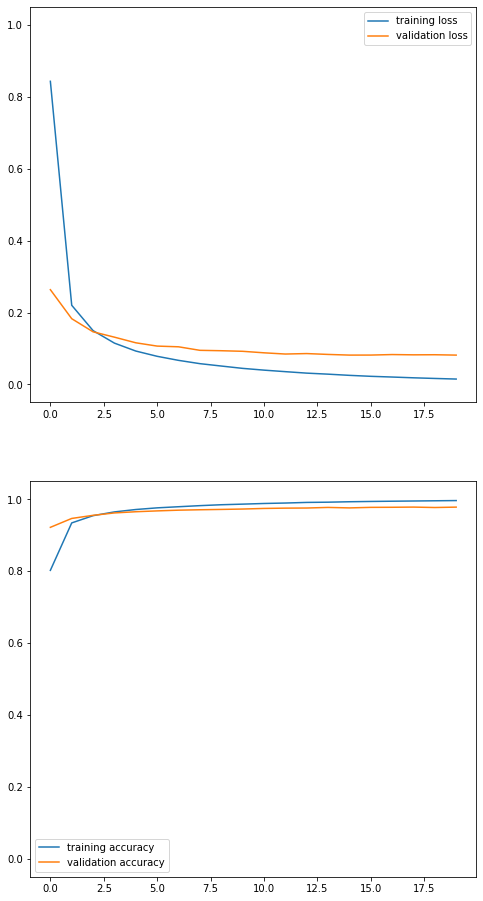

In [170]:
n_epochs = np.arange(0,20)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,16))
ax1.plot(n_epochs, history.history['loss'], label='training loss')
ax1.plot(n_epochs, history.history['val_loss'], label='validation loss')
ax1.set_ylim(-0.05,1.05)
ax1.legend()

ax2.plot(n_epochs, history.history['accuracy'], label='training accuracy')
ax2.plot(n_epochs, history.history['val_accuracy'], label='validation accuracy')
ax2.set_ylim(-0.05,1.05)
ax2.legend()

plt.show()

#### Model evaluation

In [171]:
# TO DO: Calculate test loss and accurcy

10000/10000 [==============================] - 3s 276us/sample - loss: 0.0716 - accuracy: 0.9798
